### Downloading the images from Google search

In [1]:
import os
import numpy as np
from keras.utils import to_categorical
PATH = './'
data = os.path.join(PATH,'Cartoon/')
# Making the train directory
cartoon_dir = os.path.join(PATH,'Train_Cartoon/')
if not os.path.exists(cartoon_dir):
    os.makedir(directory)
print(cartoon_dir)

/Users/ranjeetapegu/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/ranjeetapegu/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


./Train_Cartoon/


In [2]:
def get_labels(path=data):
    labels = os.listdir(path)
    label_indices = np.arange(0,len(labels))
    return (labels,label_indices,to_categorical(label_indices))

labels, label_indices,label_class =get_labels(cartoon_dir)
print(label_indices)

[0 1 2 3 4 5]


In [3]:
Test_Cartoon=os.path.join(PATH,'Test_Cartoon/')
if not os.path.exists(Test_Cartoon):
    os.mkdir(Test_Cartoon)
Test_Cartoon

'./Test_Cartoon/'

In [4]:
test_data = os.path.join(PATH,'Val_Cartoon/')
test_data

'./Val_Cartoon/'

Let's count how many pictures are in train and test dir

In [5]:
for label in labels:
    l = label +'/'
    l= os.path.join(cartoon_dir,l)
    print('total_train_image_' + label ,len(os.listdir(l)))
for label in labels:
    l = label +'/'
    l= os.path.join(Test_Cartoon,l)
    print('total_test_image_' + label ,len(os.listdir(l)))

total_train_image_Barack_Obama 1031
total_train_image_Abraham_Lincon 992
total_train_image_Steve_Jobs 712
total_train_image_Mahatma_Gandhi 632
total_train_image_Albert_Einstein 685
total_train_image_Donald_Trump 885
total_test_image_Barack_Obama 623
total_test_image_Abraham_Lincon 352
total_test_image_Steve_Jobs 224
total_test_image_Mahatma_Gandhi 208
total_test_image_Albert_Einstein 401
total_test_image_Donald_Trump 246


## Instantiating a small convet for recognizing people from cartoon

In [10]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3),name ='conv_1'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_1'))
model.add(layers.Conv2D(64,(3,3),activation='relu',name ='conv_2'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_2'))
model.add(layers.Conv2D(128,(3,3),activation='relu',name ='conv_3'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_3'))
model.add(layers.Conv2D(128,(3,3),activation='relu',name ='conv_4'))
model.add(layers.MaxPooling2D((2,2),name='maxpool_4'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu',name='dense_1'))
model.add(layers.Dense(128, activation='relu', name='dense_2'))
model.add(layers.Dense(6,activation='softmax',name='output'))
model.summary()

## Compiling the model
from keras import optimizers 
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 74, 74, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 72, 72, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 36, 36, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 34, 34, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 17, 17, 128)       0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 15, 15, 128)       147584    
__________

## Using ImageDataGenerator to read images from directories

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale =1./255)
test_datagen=ImageDataGenerator(rescale =1./255)


In [8]:
train_generator = train_datagen.flow_from_directory(cartoon_dir,
                                                    target_size =(150,150),
                                                    batch_size=35,
                                                    class_mode='categorical')
    

Found 4934 images belonging to 6 classes.


In [9]:
print(Test_Cartoon)
validation_generator = test_datagen.flow_from_directory(Test_Cartoon,
                                                        target_size =(150,150),
                                                        batch_size=35,
                                                        class_mode='categorical'
                                                       )   
validation_generator.class_indices  

./Test_Cartoon/
Found 2053 images belonging to 6 classes.


{'Abraham_Lincon': 0,
 'Albert_Einstein': 1,
 'Barack_Obama': 2,
 'Donald_Trump': 3,
 'Mahatma_Gandhi': 4,
 'Steve_Jobs': 5}

In [23]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break


data batch shape: (35, 150, 150, 3)
labels batch shape: (35, 6)


In [24]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=130, 
                              epochs =50,
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/50
 54/130 [===========>..................] - ETA: 24s - loss: 0.2877 - acc: 0.9042

/usr/lib64/python3.4/dist-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


130/130 [==============================] - 48s 371ms/step - loss: 0.2812 - acc: 0.9104 - val_loss: 1.5906 - val_acc: 0.5835
Epoch 2/50
130/130 [==============================] - 48s 368ms/step - loss: 0.2185 - acc: 0.9253 - val_loss: 1.5452 - val_acc: 0.6201
Epoch 3/50
130/130 [==============================] - 47s 361ms/step - loss: 0.1784 - acc: 0.9451 - val_loss: 1.3043 - val_acc: 0.6484
Epoch 4/50
130/130 [==============================] - 47s 360ms/step - loss: 0.1615 - acc: 0.9459 - val_loss: 1.7268 - val_acc: 0.6392
Epoch 5/50
130/130 [==============================] - 48s 365ms/step - loss: 0.1428 - acc: 0.9545 - val_loss: 1.7281 - val_acc: 0.6461
Epoch 6/50
130/130 [==============================] - 46s 352ms/step - loss: 0.1125 - acc: 0.9668 - val_loss: 2.0550 - val_acc: 0.6381
Epoch 7/50
130/130 [==============================] - 46s 351ms/step - loss: 0.1240 - acc: 0.9651 - val_loss: 1.7834 - val_acc: 0.5936
Epoch 8/50
130/130 [==============================] - 46s 355ms/st

In [25]:
model.save('cartoon_1.h5')

In [35]:
def plot_acc_loss(acc,val_Acc, loss,val_loss):
    import matplotlib.pyplot as plt
    epochs = range(1,len(acc)+1)
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(epochs,acc,'bo',label='Training_acc')
    plt.plot(epochs,val_acc,'b',label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(222)
    plt.plot(epochs,loss,'ro',label='Training_loss')
    plt.plot(epochs,val_loss,'r',label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

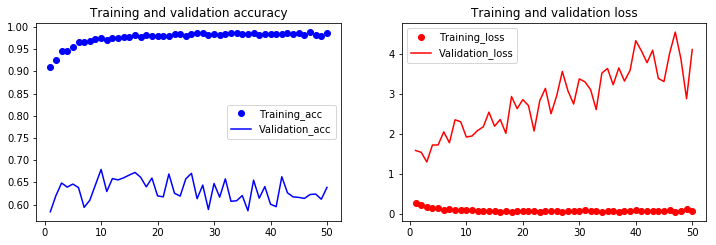

In [36]:
acc= history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

plot_acc_loss(acc,val_acc, loss,val_loss) 

In [37]:
import pandas as pd
type(val_loss)
ma= {'Acc':acc,'Val_Acc':val_acc,'Loss':loss,'Val_loss':val_loss}
model_Acc= pd.DataFrame(ma)
model_Acc.to_csv("Cartoon_model_1.csv")

In [10]:
print(train_generator.class_indices )



{'Steve_Jobs': 5, 'Albert_Einstein': 1, 'Abraham_Lincon': 0, 'Mahatma_Gandhi': 4, 'Barack_Obama': 2, 'Donald_Trump': 3}


In [14]:
def test_img(img):
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    from keras.preprocessing import image
    ob=cv2.imread(img)
    ob.shape
    obimg = cv2.resize(ob,(150,150),interpolation=cv2.INTER_AREA)
#print(obimg.shape)
#converting from BGR to RBG
    obimg = cv2.cvtColor(obimg,cv2.COLOR_BGR2RGB)
    print('Converting Image to Array')
    img_tensor = image.img_to_array(obimg)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    print(img_tensor.shape)
    plt.imshow(img_tensor[0])
    plt.show()
    return(img_tensor)

# PREDICTION 

In [11]:
from keras.models import load_model
model = load_model('cartoon_1.h5')

In [12]:
Pred_Cartoon=os.path.join(PATH,'Prediction_Test/')
#pred_path = os.path.join(PATH,'Prediction_Test/')
Pred_Cartoon

'./Prediction_Test/'

Converting Image to Array
(1, 150, 150, 3)


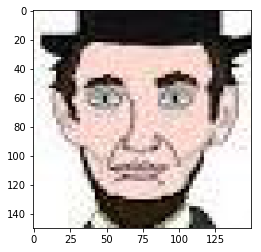

In [15]:
img=os.path.join(Pred_Cartoon,'AbrahamLincoln0071.jpeg')
img_tensor=test_img(img)            

In [16]:
model.predict(img_tensor)

array([[2.6300606e-11, 5.6723607e-15, 9.9999058e-01, 9.4442767e-06,
        3.2992159e-24, 2.9404720e-10]], dtype=float32)

Converting Image to Array
(1, 150, 150, 3)


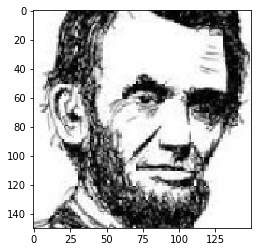

array([[1.0000000e+00, 9.8971217e-15, 6.2700036e-12, 2.2020216e-14,
        3.6548204e-08, 3.3797867e-13]], dtype=float32)

In [17]:
img=os.path.join(Pred_Cartoon,'AbrahamLincoln0074.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)

Converting Image to Array
(1, 150, 150, 3)


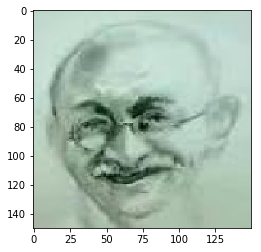

array([[1.2189107e-05, 9.9998784e-01, 1.6381487e-17, 7.3081610e-12,
        7.2963392e-11, 2.4877498e-14]], dtype=float32)

In [18]:
img=os.path.join(Pred_Cartoon,'MahatmaGandhi0056.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)


Converting Image to Array
(1, 150, 150, 3)


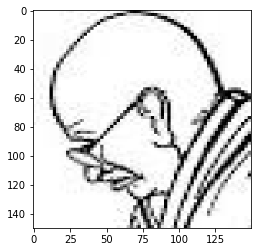

array([[1.0000000e+00, 5.6029374e-12, 6.6246519e-09, 4.6133597e-17,
        1.6056694e-16, 5.2477093e-14]], dtype=float32)

In [20]:
img=os.path.join(Pred_Cartoon,'MahatmaGandhi0104.jpg')
img_tensor=test_img(img)
model.predict(img_tensor)

Converting Image to Array
(1, 150, 150, 3)


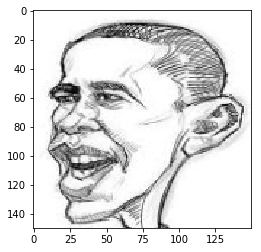

array([[6.7378202e-25, 3.1763136e-27, 1.0000000e+00, 6.8632706e-18,
        1.4810029e-22, 1.5326477e-14]], dtype=float32)

In [21]:
img=os.path.join(Pred_Cartoon,'BarackObama0114.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)

Converting Image to Array
(1, 150, 150, 3)


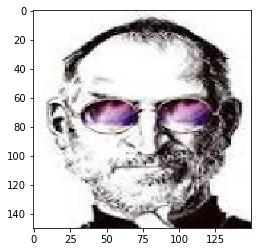

array([[2.0913920e-25, 3.5374617e-36, 1.0000000e+00, 2.0676936e-28,
        3.7311026e-30, 1.4252304e-12]], dtype=float32)

In [19]:
img=os.path.join(Pred_Cartoon,'SteveJobs0022.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)